<a href="https://colab.research.google.com/github/Deon62/FeedForward-Neural-Networks/blob/main/RealEstateMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import TensorBoard
import numpy as np


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/BostonHousing.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


# Feed Forward Neural Network
# Boston house price  prediction
# Data description

Here’s the meaning of each column in the Boston House Pricing dataset:

1. **crim**: Per capita crime rate by town.
2. **zn**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **indus**: Proportion of non-retail business acres per town.
4. **chas**: Charles River dummy variable (1 if the tract bounds the river; 0 otherwise).
5. **nox**: Nitric oxides concentration (parts per 10 million).
6. **rm**: Average number of rooms per dwelling.
7. **age**: Proportion of owner-occupied units built before 1940.
8. **dis**: Weighted distances to five Boston employment centers.
9. **rad**: Index of accessibility to radial highways.
10. **tax**: Full-value property-tax rate per $10,000.
11. **ptratio**: Pupil-teacher ratio by town.
12. **b**: 1000(Bk - 0.63)^2, where Bk is the proportion of Black people by town.
13. **lstat**: Percentage of lower status of the population.
14. **medv**: Median value of owner-occupied homes in $1000s (target variable).



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

split data for modelling

In [ ]:
X = data.drop("medv",axis=1 )
y = data["medv"]

X = pd.DataFrame(X)
y = pd.DataFrame(y)



In [ ]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feed Forward Neural Network


In [ ]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(128, activation = 'relu' , input_shape =(X_train.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',                      # Adam optimizer
    loss='mse',                            # Mean Squared Error loss
    metrics=['mae']                        # Mean Absolute Error for evaluation
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,273 (55.75 KB)

 Trainable params: 14,273 (55.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
r = model.fit(X_train , y_train,
              epochs = 100,
              batch_size = 32,
              validation_split = 0.2,
              verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 585.0994 - mae: 22.2442 - val_loss: 438.7957 - val_mae: 19.3770
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 439.2998 - mae: 19.4425 - val_loss: 323.5027 - val_mae: 16.2009
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 339.0043 - mae: 16.2782 - val_loss: 153.8830 - val_mae: 10.5489
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 133.2626 - mae: 9.3680 - val_loss: 86.7192 - val_mae: 6.9330
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.9783 - mae: 6.8731 - val_loss: 65.1163 - val_mae: 5.9558
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.8272 - mae: 5.6809 - val_loss: 43.1649 - val_mae: 4.6269
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.8688 - mae: 4.6681 - val_loss: 35.7173 - val_mae: 4.0598
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.9700 - mae: 3.8106 - val_loss: 32.7870 - val_mae: 4.1530
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.5861 - mae: 2.8933 
Test MAE: 2.791128158569336


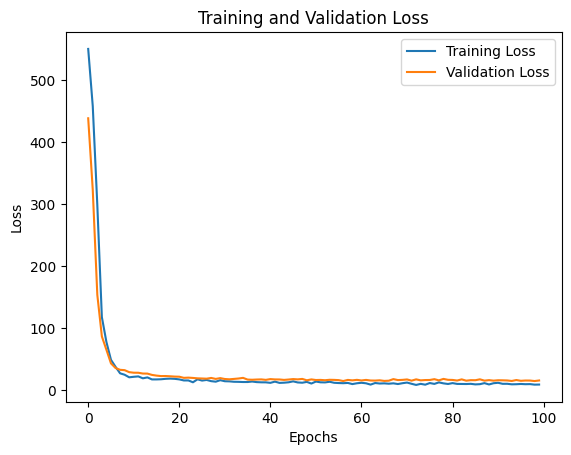

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Compare predicted and actual values
for i in range(5):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {predictions[i][0]:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Actual: medv    50.0
Name: 195, dtype: float64, Predicted: 46.55
Actual: medv    36.2
Name: 4, dtype: float64, Predicted: 29.20
Actual: medv    11.7
Name: 434, dtype: float64, Predicted: 14.79
Actual: medv    14.9
Name: 458, dtype: float64, Predicted: 14.04
Actual: medv    30.8
Name: 39, dtype: float64, Predicted: 30.48
